In [109]:
# Import essentail libraries
import numpy as np  
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression # For Logistic Regression algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier # For K nearest neighbours Algorithm
from sklearn import svm # for Support Vector Machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree algorithm

In [110]:
#  Read file
iris = pd.read_csv('Iris.csv')

In [111]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [112]:
iris.info() 
#checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [113]:
# Remove unneeded column
iris.drop('Id', axis = 1, inplace = True)
# dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe

# Exploratory Data Analysis

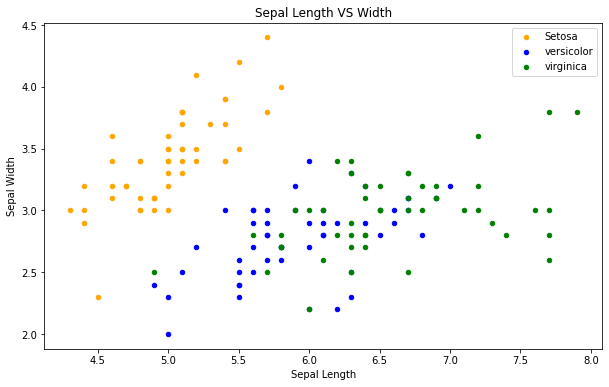

In [114]:
# Visualize Sepal Length and Width
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color ='green', label = 'virginica', ax = fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

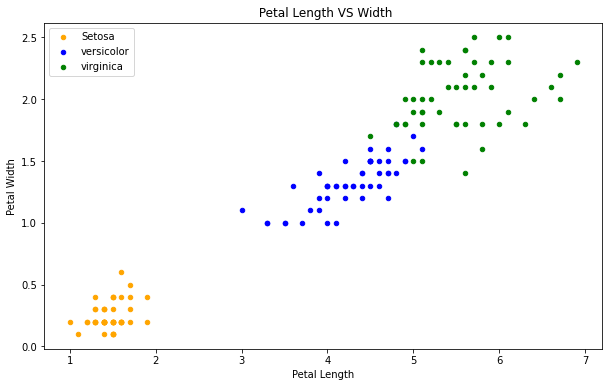

In [115]:
# Visualize Petal Length and Width
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color ='green', label = 'virginica', ax = fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

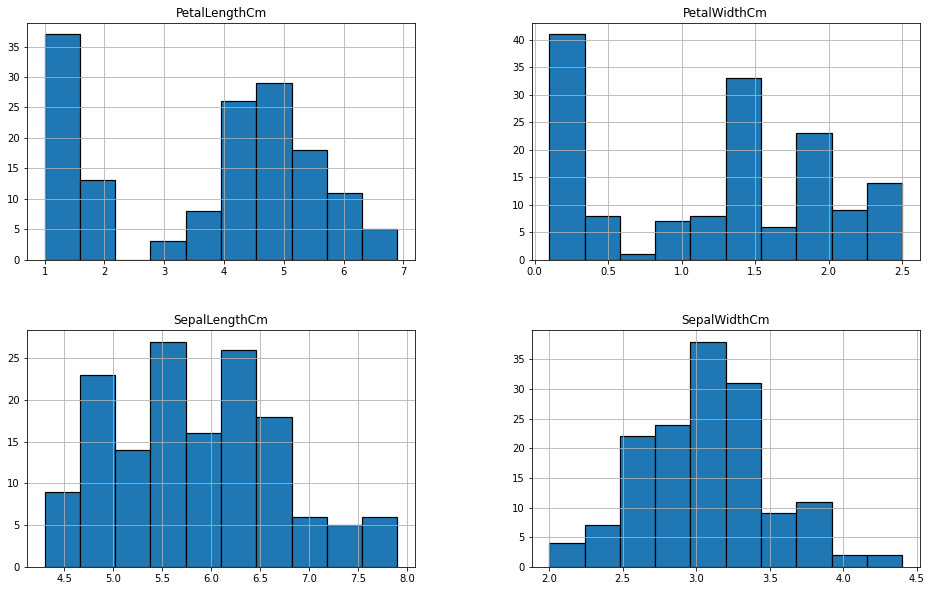

In [116]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.show()

# Visual how the length and width vary according to species

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

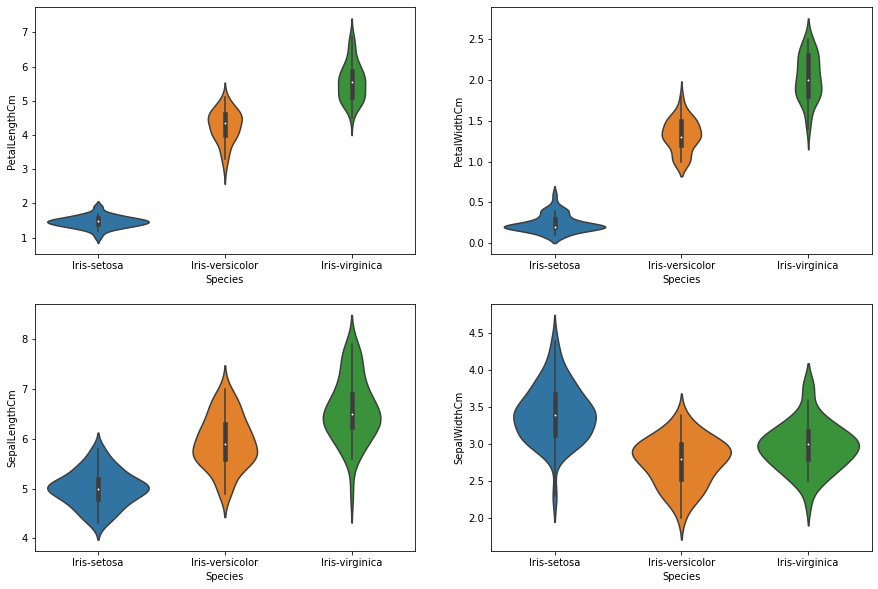

In [117]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data= iris)
plt.subplot(2,2,2)
sns.violinplot (x = 'Species', y = 'PetalWidthCm', data = iris)
plt.subplot(2,2,3)
sns.violinplot(x = 'Species', y= 'SepalLengthCm', data = iris)
plt.subplot(2,2,4)
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = iris)
# The thinner part denotes that there is less density whereas the fatter part conveys higher density

In [118]:
iris.shape

(150, 5)

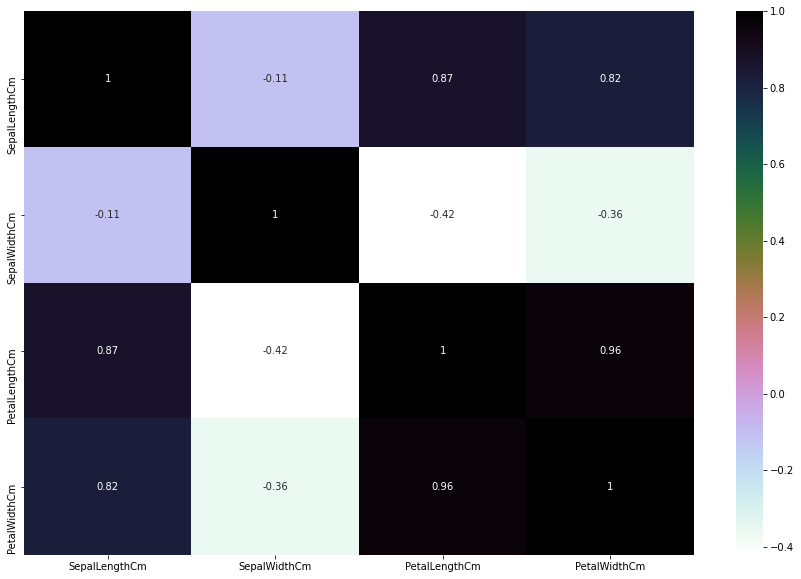

In [119]:
plt.figure(figsize=(15,10)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()


# Splitting the data into Training and Testing Dataset

In [120]:
train, test = train_test_split(iris, test_size = 0.3)  #==> test = 30% train = 70%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [121]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

In [122]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
89,5.5,2.5,4.0,1.3
17,5.1,3.5,1.4,0.3


In [123]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
137,6.4,3.1,5.5,1.8


In [124]:
train_y.head(2)

89    Iris-versicolor
17        Iris-setosa
Name: Species, dtype: object

# SVM algorithm

In [125]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9333333333333333


# Logistic Regression

In [126]:
model = LogisticRegression()
model.fit(train_X,train_y) # pass the training dataset to the algorithm to train it
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9555555555555556
C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Decision Tree

In [127]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9111111111111111


# K-Nearest Neighbours

In [128]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9555555555555556


In [129]:
# check the accuracy for various values of n for K-Nearest nerighbours

ipykernel_launcher:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


([<matplotlib.axis.XTick at 0x1d23ca00f08>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

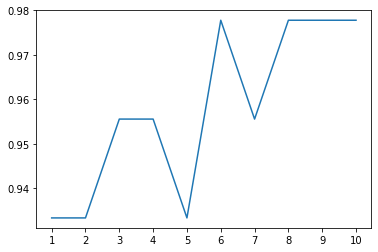

In [130]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)